In [125]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
df = pd.read_csv("cleaned_diabetes_dataset_iqr.csv")
df.drop(columns=['ID', 'No_Pation'], inplace=True)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
1,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
2,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
3,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,N
4,F,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N


In [127]:
le_gender = LabelEncoder()
le_class = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["CLASS"] = le_class.fit_transform(df["CLASS"])

In [128]:
# ----- Show Gender Mapping -----
print("Gender Encoding Mapping:\n")
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))

for key, value in gender_mapping.items():
    print(f"{value} → {key}")

# ----- Show CLASS Mapping -----
print("\nClass Encoding Mapping:\n")
class_mapping = dict(zip(le_class.classes_, le_class.transform(le_class.classes_)))

for key, value in class_mapping.items():

    if key == "N":
        meaning = "Non-Diabetic"
    elif key == "P":
        meaning = "Prediabetic"
    elif key == "Y":
        meaning = "Diabetic"
    else:
        meaning = "Unknown"

    print(f"{value} → {key} ({meaning})")

Gender Encoding Mapping:

0 → F
1 → M

Class Encoding Mapping:

0 → N (Non-Diabetic)
1 → P (Prediabetic)
2 → Y (Diabetic)


In [129]:
X = df.drop("CLASS", axis=1)
y = df["CLASS"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [131]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [132]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [133]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [134]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [136]:
print("🔹 Logistic Regression Results")
evaluate(log_model, X_test, y_test)

print("\n🔹 Decision Tree Results")
evaluate(dt_model, X_test, y_test)

print("\n🔹 Random Forest Results")
evaluate(rf_model, X_test, y_test)

print("🔹 KNN Model Results")
evaluate(knn_model, X_test, y_test)

🔹 Logistic Regression Results
Accuracy: 0.8897

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.75      0.21      0.33        14
           2       0.89      0.99      0.94       109

    accuracy                           0.89       136
   macro avg       0.85      0.66      0.70       136
weighted avg       0.88      0.89      0.87       136

Confusion Matrix:
[[ 10   1   2]
 [  0   3  11]
 [  1   0 108]]

🔹 Decision Tree Results
Accuracy: 0.9632

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      0.71      0.80        14
           2       0.96      0.99      0.98       109

    accuracy                           0.96       136
   macro avg       0.96      0.90      0.93       136
weighted avg       0.96      0.96      0.96       136

Confusion Matrix:
[[ 13   0   0]
 [  

In [137]:
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

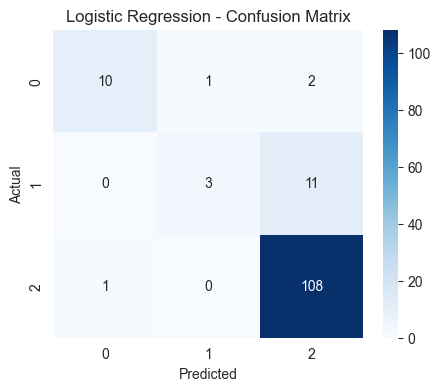

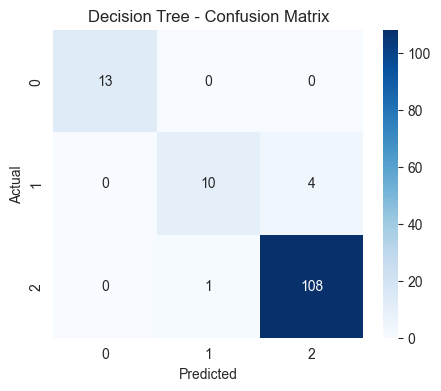

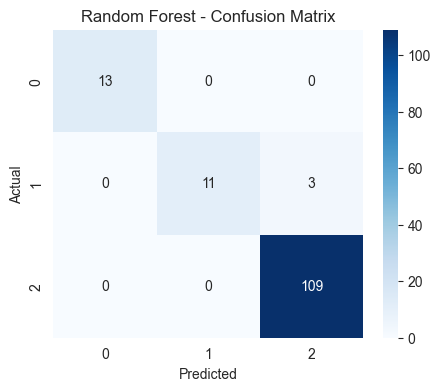

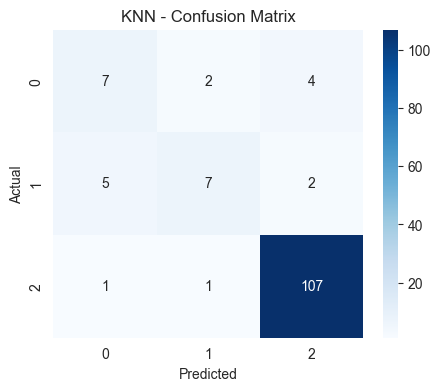

In [138]:
plot_confusion_matrix(log_model, X_test, y_test, "Logistic Regression - Confusion Matrix")
plot_confusion_matrix(dt_model, X_test, y_test, "Decision Tree - Confusion Matrix")
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest - Confusion Matrix")
plot_confusion_matrix(knn_model, X_test, y_test, "KNN - Confusion Matrix")

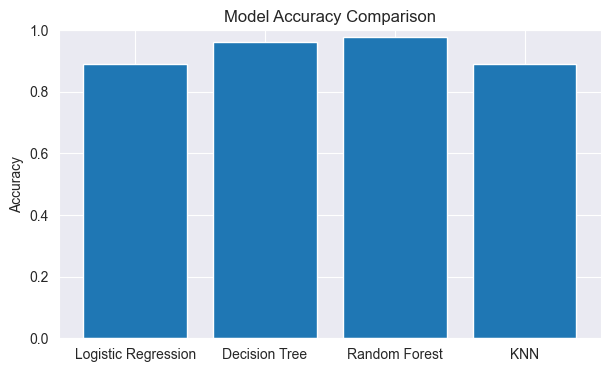

{'Logistic Regression': 0.8897058823529411,
 'Decision Tree': 0.9632352941176471,
 'Random Forest': 0.9779411764705882,
 'KNN': 0.8897058823529411}

In [139]:
accuracies = {
    "Logistic Regression": accuracy_score(y_test, log_model.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, dt_model.predict(X_test)),
    "Random Forest": accuracy_score(y_test, rf_model.predict(X_test)),
    "KNN": accuracy_score(y_test, knn_model.predict(X_test))
}

plt.figure(figsize=(7,4))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

accuracies

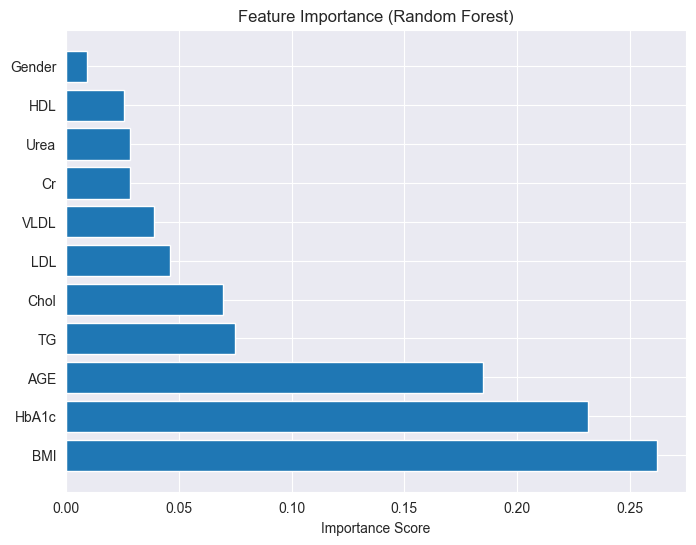

In [145]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(features[indices], importances[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [141]:
# ---- Younger age group and diabetes percentage (compatible version) ----
data = df.copy()

age_threshold = 40

# Subset younger group
younger = data[data['AGE'] < age_threshold]

print("Unique CLASS values:", data['CLASS'].unique())

diabetic_classes = [1, 2]   

younger_total = len(younger)
younger_diabetic = younger['CLASS'].isin(diabetic_classes).sum()

younger_diabetic_percentage = (younger_diabetic / younger_total) * 100 if younger_total > 0 else 0

print(f"Total younger patients (AGE < {age_threshold}): {younger_total}")
print(f"Diabetic/Prediabetic younger patients: {younger_diabetic}")
print(f"Percentage of younger people with diabetes/prediabetes: {younger_diabetic_percentage:.2f}%")

Unique CLASS values: [0 1 2]
Total younger patients (AGE < 40): 7
Diabetic/Prediabetic younger patients: 5
Percentage of younger people with diabetes/prediabetes: 71.43%


In [142]:
# Count CLASS distribution per Gender
gender_class_counts = df.groupby("Gender")["CLASS"].value_counts().unstack(fill_value=0)

print("=== Diabetes / Prediabetes Counts by Gender ===")
print(gender_class_counts)

# Calculate % of individuals at risk (CLASS 1 + CLASS 2)
gender_at_risk_pct = (
    (gender_class_counts[1] + gender_class_counts[2]) /
    gender_class_counts.sum(axis=1) * 100
)

print("\n=== Percentage of Diabetic/Prediabetic by Gender ===")
print(gender_at_risk_pct.round(2).astype(str) + "%")

=== Diabetes / Prediabetes Counts by Gender ===
CLASS    0   1    2
Gender             
0       34  10  275
1       22  26  311

=== Percentage of Diabetic/Prediabetic by Gender ===
Gender
0    89.34%
1    93.87%
dtype: object


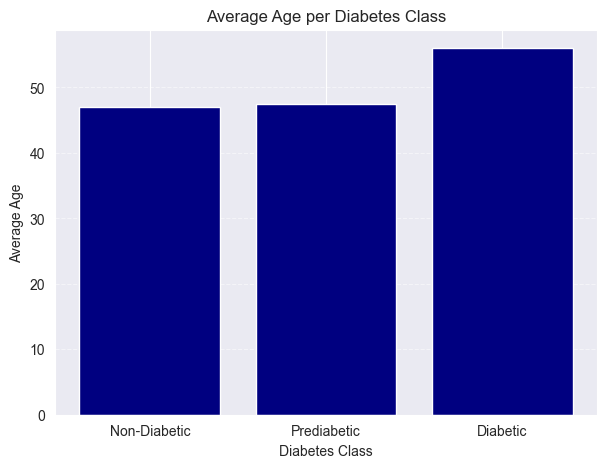

In [147]:
class_map = {0: "Non-Diabetic", 1: "Prediabetic", 2: "Diabetic"}
df["CLASS_LABEL"] = df["CLASS"].map(class_map)

# Group by class and compute average age
avg_age = df.groupby("CLASS_LABEL")["AGE"].mean().reindex(["Non-Diabetic", "Prediabetic", "Diabetic"])

# Bar plot
plt.figure(figsize=(7,5))
plt.bar(avg_age.index, avg_age.values, color="navy")
plt.title("Average Age per Diabetes Class")
plt.xlabel("Diabetes Class")
plt.ylabel("Average Age")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()